In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from io import StringIO

In [5]:
csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

In [6]:
csv_data = unicode(csv_data)
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1,2,3,4
1,5,6,NaN,8
2,10,11,12,NaN


In [9]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [10]:
from sklearn.preprocessing import Imputerputer

In [12]:
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

In [14]:
df = pd.DataFrame([['green', 'M', 10.0, 'class1'],
                  ['red', 'L', 13.5, 'class2'],
                  ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.0,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [15]:
size_mapping = {'XL':3, 'L':2, 'M':1}
df['size'] = df['size'].map(size_mapping) #map size to number
df

,color,size,price,classlabel
0,green,1,10.0,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [16]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}

In [17]:
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [18]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.0,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [19]:
inv_class_mapping = {v:k for k, v in class_mapping.items()}
inv_class_mapping

{0: 'class1', 1: 'class2'}

In [20]:
df.classlabel = df.classlabel.map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.0,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1L, 1L, 10.0],
       [2L, 2L, 13.5],
       [0L, 3L, 15.3]], dtype=object)

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10. ],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [25]:
wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [26]:
wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

In [27]:
print "Class labels:", wine["Class label"].unique()

Class labels: [1 2 3]


In [28]:
wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [29]:
from sklearn.cross_validation import train_test_split

In [30]:
X, y = wine.iloc[:, 1:].values, wine.iloc[:, 0].values #feature and label matrices
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
print xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

(124L, 13L) (54L, 13L) (124L,) (54L,)


In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
mms = MinMaxScaler() #subtract minimum and divide by (max-min) to scale between 0 and 1
xtrain_norm = mms.fit_transform(xtrain)
xtest_norm = mms.transform(xtest)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
stdsc = StandardScaler() #subtract mean and divide by standard deviation
xtrain_std = stdsc.fit_transform(xtrain)
xtest_std = stdsc.transform(xtest)

In [37]:
from sklearn.linear_model import LogisticRegression

In [54]:
lr = LogisticRegression(penalty='l1', C=0.1) #L1 regularization using absolute value of coefficients
lr.fit(xtrain_std, ytrain)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [55]:
print "Training accuracy:", lr.score(xtrain_std, ytrain)
print "Test accuracy:", lr.score(xtest_std, ytest)
print lr.coef_

Training accuracy: 0.983870967742
Test accuracy: 0.981481481481
[[ 0.28020454  0.          0.         -0.02794535  0.          0.
   0.71021093  0.          0.          0.          0.          0.
   1.23616781]
 [-0.6439597  -0.06880174 -0.05721546  0.          0.          0.          0.
   0.          0.         -0.92681675  0.06010774  0.         -0.37101635]
 [ 0.          0.06156559  0.          0.          0.          0.
  -0.63559976  0.          0.          0.4978895  -0.35833658 -0.57155058
   0.        ]]


In [58]:
for i, mod in enumerate(lr.coef_):
    print "For model %d there are %d non-zero coefficients." %(i, sum(abs(mod) > 1e-10))
    print mod
    print ""

For model 0 there are 4 non-zero coefficients.
[ 0.28020454  0.          0.         -0.02794535  0.          0.
  0.71021093  0.          0.          0.          0.          0.
  1.23616781]

For model 1 there are 6 non-zero coefficients.
[-0.6439597  -0.06880174 -0.05721546  0.          0.          0.          0.
  0.          0.         -0.92681675  0.06010774  0.         -0.37101635]

For model 2 there are 5 non-zero coefficients.
[ 0.          0.06156559  0.          0.          0.          0.
 -0.63559976  0.          0.          0.4978895  -0.35833658 -0.57155058
  0.        ]



In [62]:
colors = ['blue', 'green', 'red', 'cyan', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty="l1", C=10**c, random_state=0)
    lr.fit(xtrain_std, ytrain)
    weights.append(lr.coef_[2]) #grab model coefficients for class 2
    params.append(10**c)

weights = np.array(weights)

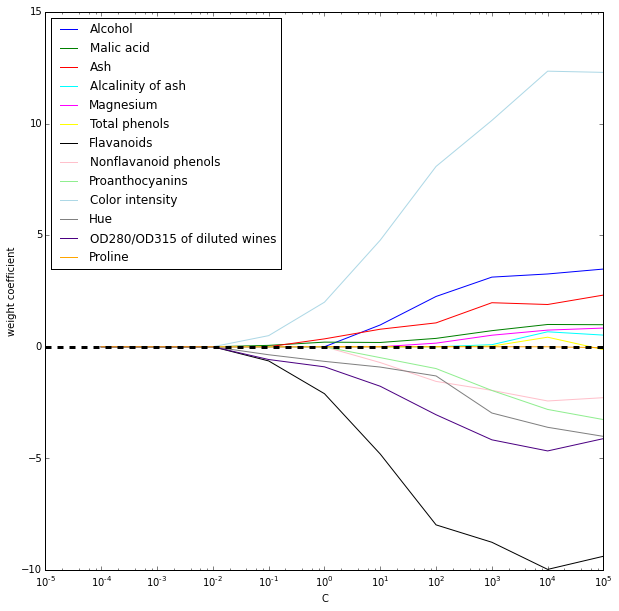

In [63]:
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for column, color in zip(range(weights.shape[1]), colors):
    #plot C vs. value of a particular coefficient as C changes
    plt.plot(params, weights[:, column], label=wine.columns[column+1], color=color)
plt.axhline(0, color="black", linestyle="--", linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.xlabel('C')
plt.ylabel("weight coefficient")
plt.xscale("log")
plt.legend(loc='best')

In [64]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score

In [65]:
class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features #number of features in reduced model
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \ #split data into training and test sets
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1] #number of features in X
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores) #find index of best performing subset
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(xtrain_std, ytrain)

<__main__.SBS instance at 0x000000000C8B5548>

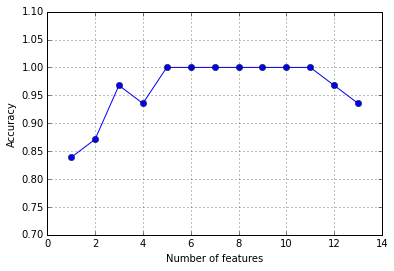

In [70]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.grid()

In [71]:
k5 = list(sbs.subsets_[8])
print wine.columns[1:][k5]

Index([u'Alcohol', u'Malic acid', u'Alcalinity of ash', u'Hue', u'Proline'], dtype='object')


In [74]:
#performance of KNN classifier on original test set
knn.fit(xtrain_std, ytrain)
print "Training accuracy:", accuracy_score(knn.predict(xtrain_std), ytrain)
print "Test accuracy:", accuracy_score(knn.predict(xtest_std), ytest)

Training accuracy: 0.983870967742
Test accuracy: 0.944444444444


In [77]:
#performance on reduced feature set
knn.fit(xtrain_std[:, k5], ytrain)
print "Training accuracy:", knn.score(xtrain_std[:, k5], ytrain)
print "Test accuracy:", accuracy_score(knn.predict(xtest_std[:, k5]), ytest)

Training accuracy: 0.959677419355
Test accuracy: 0.962962962963


In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
feat_labels = wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000, random_state=0)
forest.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [88]:
importances = forest.feature_importances_[::-1] #sort in order of descending importance
indices = np.argsort(importances)[::-1]
for f in range(xtrain.shape[1]):
    print "%2d %-*s %f" %(f+1, 30, feat_labels[f], importances[indices[f]])
print forest.feature_importances_.sum()

 1 Alcohol                        0.182508
 2 Malic acid                     0.158574
 3 Ash                            0.150954
 4 Alcalinity of ash              0.131983
 5 Magnesium                      0.106564
 6 Total phenols                  0.078249
 7 Flavanoids                     0.060717
 8 Nonflavanoid phenols           0.032039
 9 Proanthocyanins                0.025385
10 Color intensity                0.022369
11 Hue                            0.022070
12 OD280/OD315 of diluted wines   0.014655
13 Proline                        0.013933
1.0


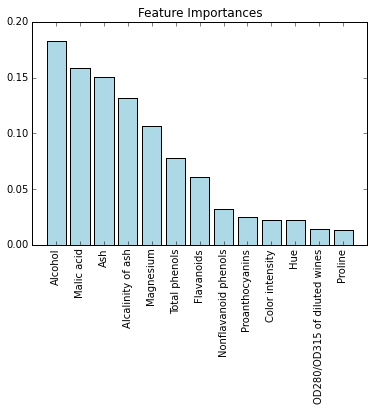

In [86]:
plt.title("Feature Importances")
plt.bar(range(xtrain.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(xtrain.shape[1]), feat_labels, rotation=90)
plt.xlim([-1, xtrain.shape[1]])
plt.show()